5010it [00:00, 13859.29it/s]


output_v1_credit_train/rl4rs/agents/sid_SIDPolicy_credit_actor0.001_critic0.001_entropy0.1_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7/model_train.report
episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss
49340.0	11.645319386033822	28.80771470839616	15.317364819002467	2.005298048849927	12.51390723676871	15.71523178807947	4.2052980132450335	-0.08198105949933167	0.03975071316671292
###########################################################


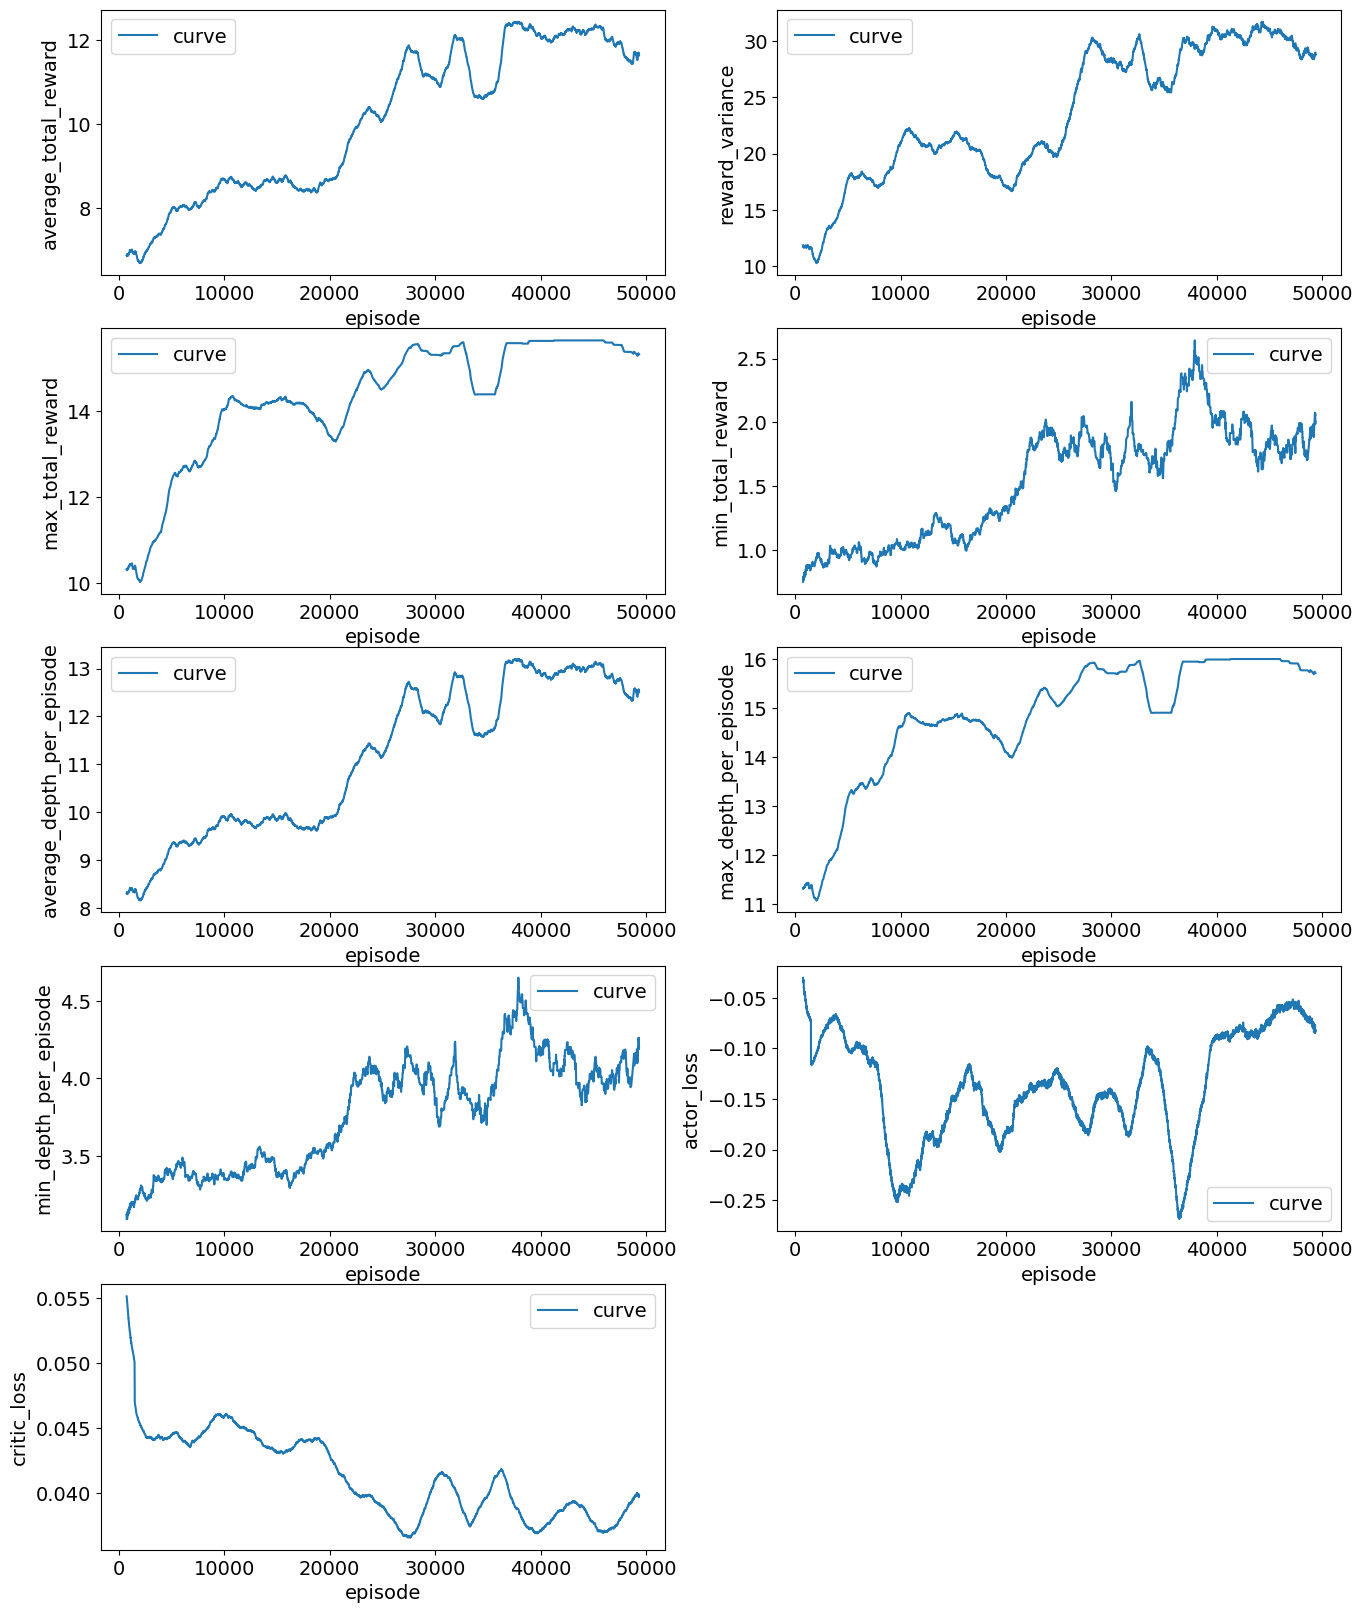

2000it [00:00, 14701.92it/s]


output_v1_credit_train/rl4rs/agents/sid_SIDPolicy_credit_actor0.001_critic0.001_entropy0.1_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7/model.report
episode	average_total_reward	reward_variance	max_total_reward	min_total_reward	average_depth_per_episode	max_depth_per_episode	min_depth_per_episode	actor_loss	critic_loss
19240.0	12.308490614227901	31.750187412200408	15.64444351196289	1.6835909016084987	13.084105952686032	16.0	3.880794701986755	0.0	0.0
###########################################################


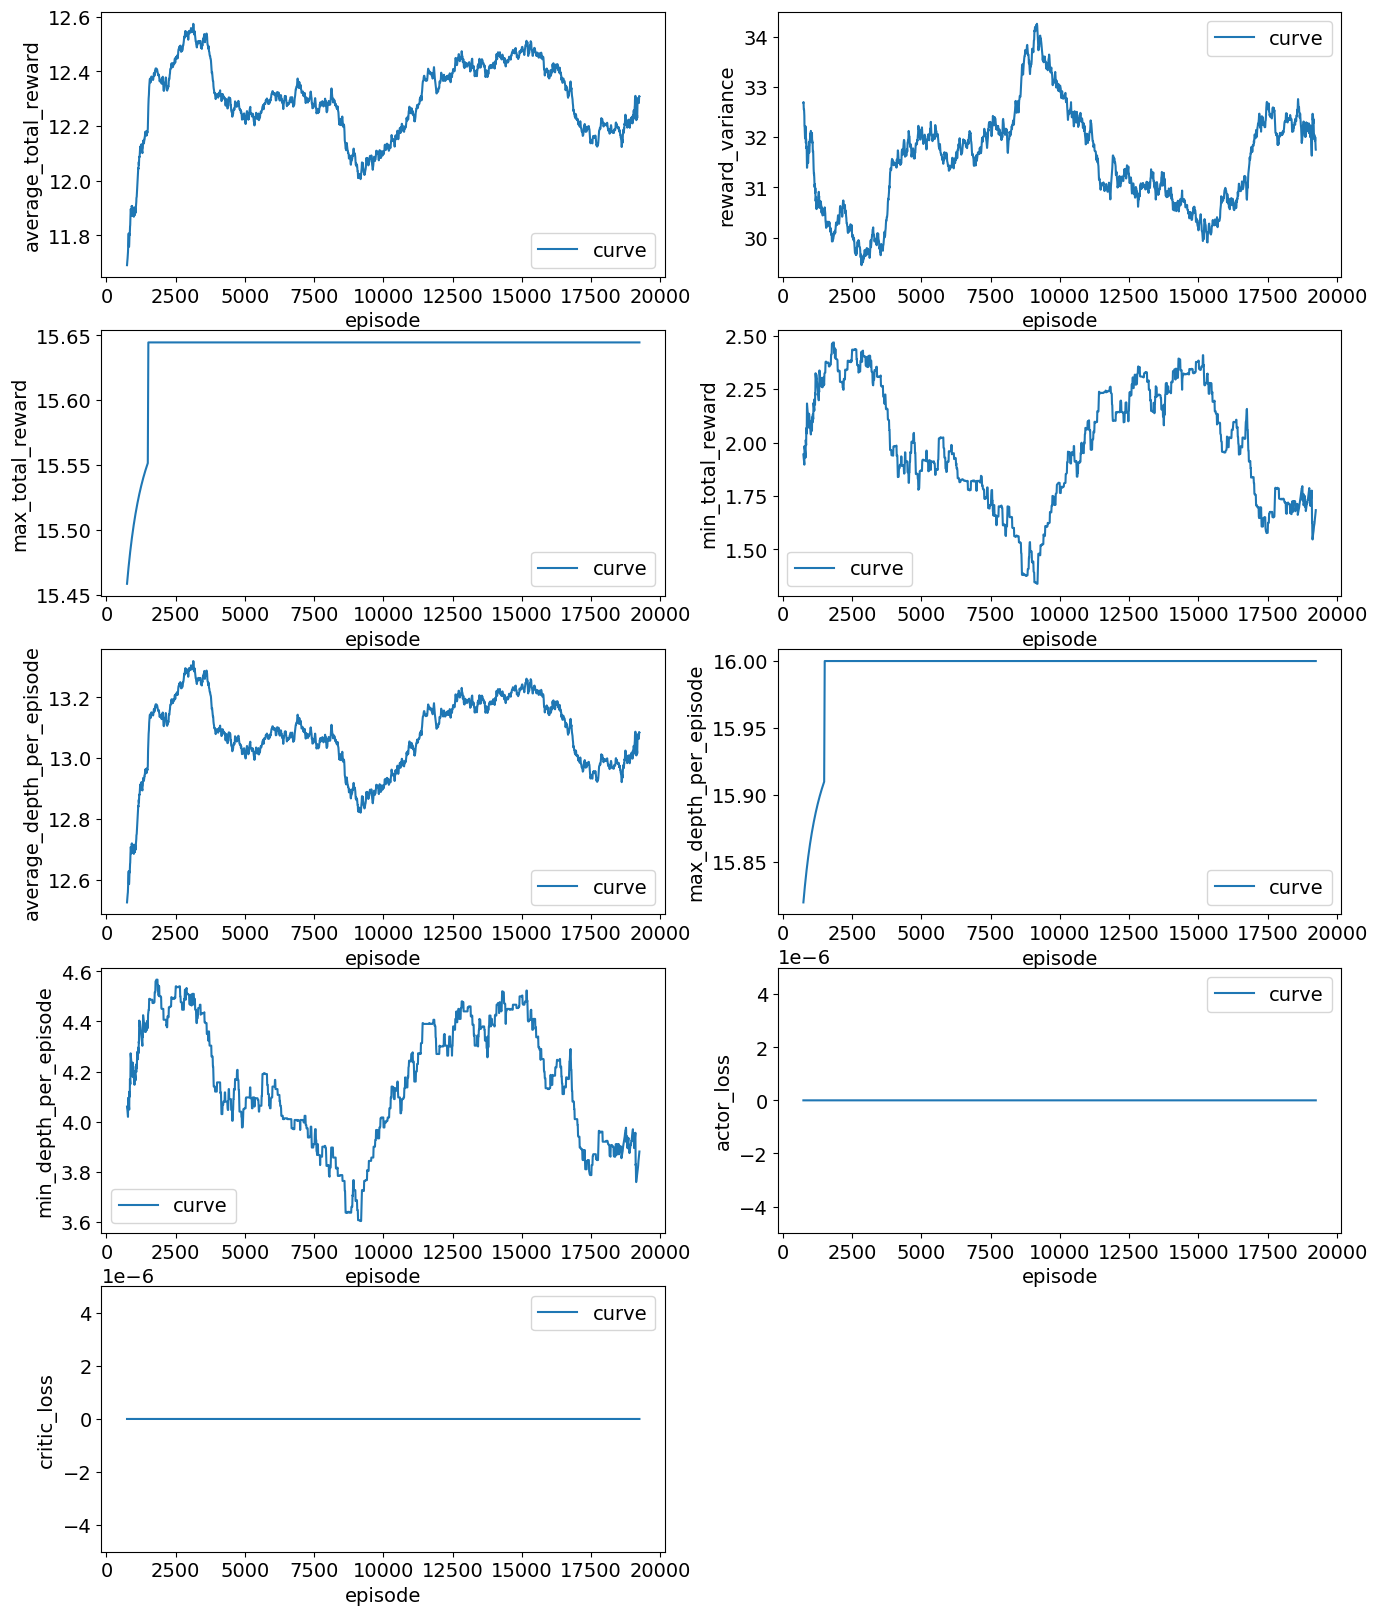

over


In [ ]:
%matplotlib inline
from plot_utils import get_training_info, get_rl_training_info, plot_multiple_line, smooth
import numpy as np

smoothness = 300
import os

directory_path = "output_v1_credit_train/rl4rs/agents"


train = [True,False]
for x in [0.1]:
    for is_train in train:
        i = f"sid_SIDPolicy_credit_actor0.001_critic0.001_entropy{x}_1000_niter50100_reg0.00001_ep0_noise0.01_bs64_epbs32_advantage0_step20_seed7"

        path = directory_path + '/' + i+'/model.report'
        if is_train:
            path = directory_path + '/' + i+'/model_train.report'
        if not os.path.exists(path):
            continue
        info = get_rl_training_info(path, ['actor_loss', 'critic_loss'])
        
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        print(path)
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
        print('###########################################################')
        plot_multiple_line(["curve"], [info], x_name = 'episode')

print('over')